# Introduction

This guide explains how to use the `decentralized market software` and in doing so explains explains the economics behind the software.  

# Run your first simulation

Here is a very brief description that will be explained in more detail later in this guide.

> Right now you can choose the following agent types:
* `ZID`, `ZIDP`, `ZIDA`, `ZIDPA`, `ZIDPR`
* `TODO`: Document agent types
* There are **num_traders** agents who a `BUYER` or a `SELLER`
* Buyers have **num_units** reservation values for units they buy
* `Demand` is the list of all buyers' reservation values sorted from highest to lowest.
* Each value is randomly drawn U\[lower_bound, upper_bound\] and then sorted from high to low
* Sellers have *num_units* unit costs for units they sell
* Each cost is randomly drawn U\[lower_bound, upper_bound\] and then sorted from low to high
* `Supply` is the list of all sellers' unit_costs sorted from lowest to highest.

> Agents start randomly allocated on a grid of **grid_size** x **grid_size**
* agents can travel to an adjacent location on the grid once a period 
* agents cannot travel across grid boundaries
* there are **num_periods** in a week, **num_weeks** in a trial and **num_trials** in a simulation
* Each week agents reservations values are renewed and each period agents can move
* trials are independent

> Agents at the same location after moving each week can negotiate a contract:
* Contracts are for one unit
* A contract is made between a buyer and seller and is an agreement to a price. `contract =  (buyer_id, seller_id, price)`
* When a contract is made the `buyer earns: value - price`, and the `seller earns price - cost`

> Each period negotiation occurs after agents have moved
* Negotiation lasts **num_rounds**
* each round consists of a `order stage` and a `transact stage`
* in the `order stage` buyers make `BIDS` and sellers make `ASKS` which are put in an `order_book`.
* in the `transact stage` buyers send `BUY` messages and sellers send `SELL` messages to the `order book`.
* valid `BUY` and `SELL` messages result in contracts

>To measure the performance of a market we calculate efficiency as actual_earnings/maximum_earnings
* actual_earnings is the sum of buyer and seller earnings as calculated from contracts
* maximum earnings is the area between supply and demand up to the competitive equilibrium


## Import dm_sim, and run make_monte_carlo

In [2]:
import dm_sim as sim
import dm_agents
# try new trader_maker_objects
ZID = dm_agents.ZID
ZIDA = dm_agents.ZIDA
ZIDPA = dm_agents.ZIDPA
trader_objects =[(ZIDA, 6),(ZIDPA, 6), (ZID, 8)] # run simulation with just ZID agents
sim_name = "ZID/ZIDA MONTE-CARLO"
num_trials = 10
num_periods = 7
num_weeks = 50
num_rounds = 5
grid_size = 15
num_traders = 20
num_units = 8
# reservation value bounds
lower_bound = 200 
upper_bound = 600

# run Monte_Carlo
data_table = sim.make_monte_carlo(sim_name, num_trials, num_periods, num_weeks,
                                  num_rounds, grid_size,
                                  num_traders, num_units,
                                  lower_bound, upper_bound,
                                  trader_objects)
print(sim_name, 'finished.')

ZID/ZIDA MONTE-CARLO finished.


## Collect Efficiency Measure

**eff_avg\[week\]** is the average efficiency over all trials for that week

**std_error\[week\]** is the standard error of the average

In [4]:
eff_avg, std_error, eff_min, eff_max = sim.analyze_eff_data(num_trials, num_weeks, data_table)
print('efficeincy measures finished')

efficeincy measures finished


## Graph efficiency measures

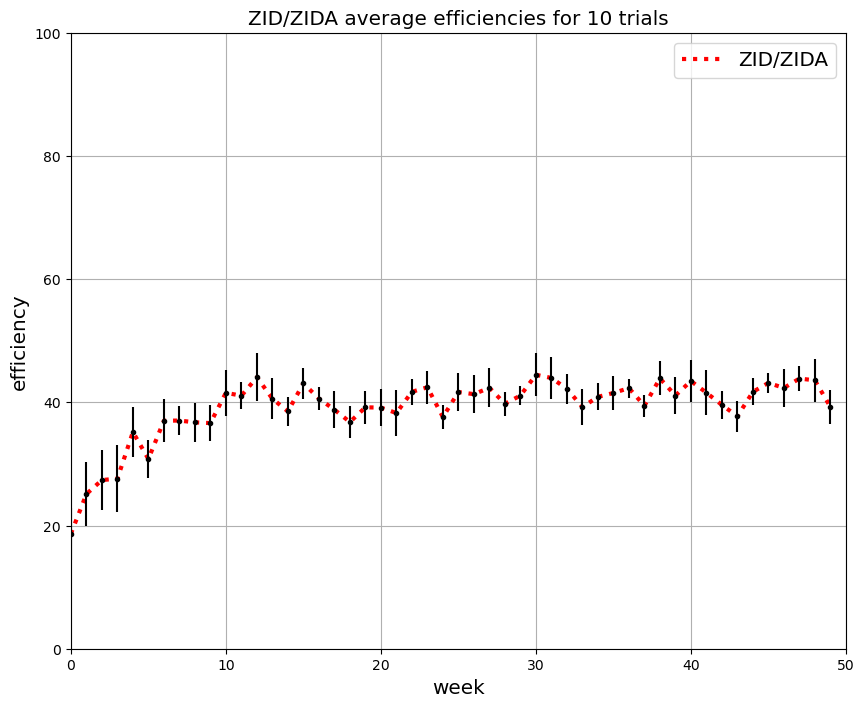

In [5]:
import matplotlib.pyplot as plt

x = range(num_weeks)
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(x, eff_avg, label = 'ZID/ZIDA', linestyle = 'dotted', color='red', lw =3)
ax.errorbar(x, eff_avg, yerr=std_error, fmt='.k')

ax.set_xlabel('week', size = 'x-large') 
ax.set_xbound(0, num_weeks)
ax.set_ybound(0, 100)
ax.grid(1)
ax.set_ylabel('efficiency', size = 'x-large') 
ax.set_title(f'ZID/ZIDA average efficiencies for {num_trials} trials', size = 'x-large')
ax.legend(fontsize='x-large')


## Coding Problem

In subsection 2.1 the simulation set a large number of control variables.  One of these variables is,
```
trader_objects =[(ZIDA, 6),(ZIDPA, 6), (ZID, 8)]
```
This is used when agents are initialized.  The `trader_objects` list consist of two tuples.  For exaample, the second tuple is,
```
(ZIDPA, 6),
```
where the first element, `ZIDPA` is the class name for the strategy being used and the second element, `6`, is the number of agent/traders that will use that strategy.  Note when we add up the numbers in each tuple they should sum to the number in `num_traders` in this case 20.

It is typical in running simulations to compare the effect of changing a control variable and then see what happens to a statistic like efficiency.  In this problem let our treatment changes be given by the list treatments as shown in the code cell below.  Your job is write a program to walk through each treatment and run a Monte_Carlo simulation for the control variables shown.  Your efficiency measures should be collected in a corresponding list so you can then plot all the measures together.  

In [ ]:
ZID = dm_agents.ZID
ZIDA = dm_agents,ZIDA

trader_objects =[] # use treatment conditions below
sim_name = "ZID and ZIDA combined MONTE-CARLO"
num_trials = 10
num_periods = 7
num_weeks = 50
num_rounds = 5
grid_size = 15
num_traders = 20
num_units = 8
lower_bound = 200 
upper_bound = 600

treatments = [ [(ZIDA, 20), (ZID,  0)], 
               [(ZIDA, 16), (ZID,  4)],
               [(ZIDA, 12), (ZID,  8)],
               [(ZIDA,  8), (ZID, 12)],
               [(ZIDA,  4), (ZID, 16)],
               [(ZIDA,  0), (ZID, 20)] ]
              

### Hint:  
If you organize your data structures correctly you may be able to use something like the following example code to plot your results.  Note the data is totally fake and didn't use the Monte_Carlo simulation, but your code should.

In [ ]:
treatments = [[(ZIDA, 20), (ZID,  0)], 
               [(ZIDA, 16), (ZID,  4)], ]

num_weeks = 8
eff_avgs = []
eff_avgs.append([10, 20, 30, 40, 50, 60, 70, 80])
eff_avgs.append([10, 17, 25, 33, 40, 48, 54, 65])
std_errors = []
std_errors.append([4, 3, 3, 2, 2, 3, 1, 1])
std_errors.append([5, 4, 4, 3, 3, 2, 2, 1])

In [ ]:
import matplotlib.pyplot as plt

x = range(num_weeks)
fig, ax = plt.subplots(figsize=(10, 8))

for k, treat in enumerate(treatments):
    label_txt = f"ZIDA_{treat[0][1]}, ZID_{treat[1][1]}"
    ax.plot(x, eff_avgs[k], label = label_txt, linestyle = 'dotted', color='red', lw =3)
    ax.errorbar(x, eff_avgs[k], yerr=std_errors[k], fmt='.k')

ax.set_xlabel('week', size = 'x-large') 
ax.set_xbound(0, num_weeks)
ax.set_ybound(0, 100)
ax.grid(1)
ax.set_ylabel('efficiency', size = 'x-large') 
ax.set_title(f'ZID/ZIDA average efficiencies for {num_trials} trials', size = 'x-large')
ax.legend(fontsize='x-large')


# Agents 

## Buyer Model

Agents are a model of the decision makers in our experiment.  In this simulation we have divided agents into an equal number of buyers and sellers.  Our mathematical model of buyers is as follows:

> **Buyers** (indexed by b) 
* reservation values: $v^b = (v_1, v_2, ..., v_K), m^b$.
    *note reservation values are decreasing or $i\le j$ implies $v_i \ge v_j$.  
* quantity bought: $q^b$
* prices paid: $p^b = (p_1, ..., p_{q^b})$
* utility:
$$u^b(q^b,p^b) = m^b + \sum_{i=1}^{q^b} v^b_i - \sum_{i = 1}^{q^b} p^b_i$$
* starting position: $e^b = (v^b, m^b, u^b, loc^b)$

So some buyer, b, has values given by $v^b = (v_1, v_2, ..., v_K)$.  Before we go any further we can ask how can we generate these values on the computer.  This is done in the `env_make_agents.py` code.  When you look at it you will see a method `gen_res_values` in the `MakeAgents` class. This method uses code similar to the code shown below.  

## Reservation value code

In [ ]:
import numpy as np

num_units = 8
ub = 600
lb = 0
interval = int((ub-lb)/4)
print('interval = ',interval)
high = ub + 1
low = lb 

values = []
for unit in range(num_units):
    value = np.random.randint(low, high)
    values.append(value)
res_values = sorted(values, reverse=True)
print(f"values = {values}")
print(f"reservation values = {res_values}")


### Note: You can use other generators like this one

In [ ]:
import numpy as np

num_units = 8
ub = 600
lb = 0
high = ub + 1
low = lb 

values = []
for unit in range(num_units):
    value = np.random.randint(low, high)
    values.append(value)
    low = lb = int(value/2)
    high = value + 1
res_values = sorted(values, reverse=True)
print(f"values = {values}")
print(f"reservation values = {res_values}")


Notice how this works.  
* Line 1 imports numpy
* Lines 3-8 set up to use numpy's function `random.randint(low, high)` which returns a random integer in the range low to high - 1.
* line 10 defines a list to hold values.
* lines 11-13 defines the values and puts them in the list
The list `values` is printed out to show you their random nature.  To turn these values into reservation values we have to sort them from highest to lowest using the builtin Python function `sorted` shown on line 14.   


## Plotting individual demand curves

In [ ]:
def plot_ind_demand(res_values, price):
    """Plot individual demand"""
    
    dunits = [units for units in range(len(res_values) + 2)] 
    munits = len(dunits)
    max_value = res_values[0]   
    demand_values = [max_value] # sets up first step
    demand_values.extend(res_values)
    demand_values.append(0) # brings curve back down to zero

    """
    Set up plot
    """
    plt.figure(figsize=(10, 7.5))  # Set plot dimensions
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(True)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

    """
    Made a bunch of small changes here
    """
    plt.step(dunits, demand_values, label='Demand')
    plt.axhline(y=price, xmin=0, xmax=8, color='r', linestyle='-', linewidth=3)
    ax.annotate('PRICE', xy=(5,price), xytext=(0,5), textcoords='offset points')

    ax = plt.gca()
    plt.legend(loc='upper center', frameon=False)
    plt.title('Individual Demand')
    plt.xlabel('units')
    plt.ylabel('currrency')

    """
    Try annotating
    """
    #for i, v in enumerate(demand_values):
    #    ax.text(i, v+5, "%d" %v, ha="center")

    for i, v in enumerate(demand_values[1:-1]):
        ax.annotate(str(v), xy=(i,v), xytext=(20,5), textcoords='offset points')
        # this works but (20, 5) is hardcoded in a not nice way

    plt.xlim(0, munits)
    plt.ylim(0, max(demand_values))
    plt.show()


In [ ]:
price = 250
plot_ind_demand(res_values, price)
q_units = 0
surp = 0
for val in res_values:
    if val >= price:
        q_units += 1
        surp += val-price
print (f"At price {price} our individual will buy {q_units} units \
and produce {surp} surplus.")

In [ ]:
dunits = [units for units in range(len(res_values) + 1)] 
utility = []
util = 0
for k, val in enumerate(res_values):
    utility.append(util + val)
    util += val
munits = len(dunits)
max_value = util   
utility_values = [max_value] # sets up first step
utility_values.extend(utility)
# demand_values.append(0) # brings curve back down to zero

"""
Set up plot
"""
plt.figure(figsize=(10, 7.5))  # Set plot dimensions
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(True)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

"""
Made a bunch of small changes here
"""
plt.step(dunits, utility_values, label='Utility')

ax = plt.gca()
plt.legend(loc='upper center', frameon=False)
plt.title('Individual Utility')
plt.xlabel('units')
plt.ylabel('currrency')

"""
Try annotating
"""
#for i, v in enumerate(demand_values):
#    ax.text(i, v+5, "%d" %v, ha="center")

for i, v in enumerate(utility_values[1:]):
    ax.annotate(str(v), xy=(i,v), xytext=(10,5), textcoords='offset points')
    # this works but (30, 5) is hardcoded in a not nice way
    
plt.xlim(0, munits)
plt.ylim(0, max(utility_values))
plt.show()


## Seller Model

> **Sellers** (indexed by s) 
* unit costs: $c^s = (c_1, c_2, ..., c_K), m^s$.
    * note unit costs are increasing or $i\ge j$ implies $c_i \ge c_j$.
* quantity sold: $q^s$
* prices received: $p^s = (p_1, ..., p_{q^s})$
* profit:
$$\pi^s(q^s,p^s) = m^s + \sum_{i=1}^{q^s} p^s_i - \sum_{i = 1}^{q^s} c^s_i$$
* starting position: $e^s = (c^s, m^s, \pi^s, loc^s)$

In [ ]:
from scipy.stats import sem
names = ['ZIDA', 'ZIDPR']

week_sur = {}
type_avg = {}

for name in names:
    week_sur[name] = []
    type_avg[name] = []
    
for week in range(num_weeks):
    for name in names:
        type_avg[name].append(0)
        week_sur[name].append([])

for trial in range(num_trials):
    effs = []
    trial_surplus = []
    trial_data = data_table[trial]
    
    for week in range(num_weeks):
        week_data = trial_data[week]
        effs.append(week_data['eff'])
        trial_surplus.append(week_data['type_effs'])
    
    for week in range(num_weeks):
        surplus = trial_surplus[week]
        for j, name in enumerate(names):
            num_players = trader_objects[j][1]
            if name in surplus:
                sur = surplus[name]
                sur/=num_players
                week_sur[name][week].append(sur)
                type_avg[name][week] += sur
            else:
                sur = 0
                week_sur[name][week].append(sur)
                type_avg[name][week] += sur

# Calculate avg and sem for each week

std_errors = {}
for name in names:
    std_errors[name] = []    
    for k in range(num_weeks):
        type_avg[name][k] /= (num_trials)
        std_error = sem(week_sur[name][k])
        std_errors[name].append(std_error)

In [ ]:
x = [k for k in range(num_weeks)]
fig, ax = plt.subplots(figsize=(10, 8))
print(type_avg['ZIDA'])
print(std_errors['ZIDPR'])
ax.plot(type_avg['ZIDA'], label = 'ZIDA', linestyle = 'solid', color='blue', lw =3)
ax.errorbar(x, type_avg['ZIDA'], yerr=std_errors['ZIDA'], color='blue')

ax.plot(type_avg['ZIDPR'], label = 'ZIDPR', linestyle = 'solid', color='green', lw =3)
ax.errorbar(x, type_avg['ZIDPR'], yerr=std_errors['ZIDPR'], color = 'green')

ax.set_xlabel('week', size = 'x-large') 
ax.set_xbound(0, num_weeks)
ax.set_ybound(0, 500)
ax.grid(1)
ax.set_ylabel('surplus', size = 'x-large') 
ax.set_title(f'Average surplus per trader + std_errors for {num_trials} trials', size = 'x-large')
ax.legend(fontsize='x-large')

In [ ]:
"""
# show data_structure for data_table
print(trial, 'parms', data_table['parms'])
for trial in range(num_trials):
    print(f"trial = {trial}")
    trial_data = data_table[trial]
    for week in range(num_weeks):
        print(f"week = {week}")
        week_data = trial_data[week]
        print(trial, week, 'contracts', week_data['contracts'])
        print()
        print(trial, week, 'grids', week_data['grids'])
        print()
        print(trial, week, 'eff', week_data['eff'])
        print()
        print(trial, week, 'type_effs') 
        for key in week_data['type_effs']:
            print(key, week_data['type_effs'][key])
        print()
"""          


# Introduction

The user guide shows you how to use the dm_market library to run decentralized market simulations. 


## Program Flow

![Program Flow](program_flow.jpg)

In [ ]:
# This works only if notebook is in same folder
import dm_bargain
import dm_travel
import dm_agents
import dm_env as env
import dm_utils as dm
import dm_sim_period as simp
import dm_process_results as pr
import env_make_agents as mkt
import dm_sim as sim

In [ ]:
# Trravel rules for movement along Torus

if loc[0] + x_dir < 0:
    location_x = loc[0] + x_dir + self.grid_dimension
elif loc[0] + x_dir > self.grid_dimension -1:
    location_x = loc[0] + x_dir - self.grid_dimension
else:
    location_x = loc[0]+ x_dir
if loc[1] + y_dir < 0:
    location_y = loc[1] + y_dir + self.grid_dimension
elif loc[1] + y_dir > self.grid_dimension -1:
    location_y = loc[1] + y_dir - self.grid_dimension

loc = (location_x, location_y)
